<a href="https://colab.research.google.com/github/CSID-DGU/2022-1-CECD3-ARTOFWAR-8/blob/main/KoGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
drive.mount('/project')

Mounted at /project


In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 67.3 MB/s 
     |████████████████████████████████| 86 kB 6.4 MB/s 
     |████████████████████████████████| 6.6 MB 50.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
!pip install fastai==2.2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 191 kB 4.9 MB/s 
     |████████████████████████████████| 12.8 MB 28.2 MB/s 
     |████████████████████████████████| 776.8 MB 17 kB/s 
     |████████████████████████████████| 55 kB 4.8 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0+cu113
    Uninstalling torchvision-0.12.0+cu113:
      Successfully uninstalled torchvision-0.12.0+cu113
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.4.4
    Uninstalling fastcore-1.4.4:
      Successfully uninstalled fastcore-1.4.4
  Attempting uninstall: fastai
    Found existing installation: fastai 2.6.3
    Uninstalling fastai-2.6.3:
      Successfully uninstalled fastai-2.6

In [5]:
from typing import Optional
import torch
import transformers
from transformers import AutoModelWithLMHead, PreTrainedTokenizerFast
from fastai.text.all import *
import fastai
import re

In [6]:
from transformers import PreTrainedTokenizerFast, GPT2LMHeadModel
import torch

In [7]:
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2",
                                                    bos_token='</s>', eos_token='</s>', unk_token='<unk>',
                                                    pad_token='<pad>', mask_token='<mask>')

model = GPT2LMHeadModel.from_pretrained('skt/kogpt2-base-v2')


Downloading:   0%|          | 0.00/2.69M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/0.98k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.


Downloading:   0%|          | 0.00/490M [00:00<?, ?B/s]

In [8]:
text = '카카오톡 사용법 동영상 노인'

In [9]:
input_ids = tokenizer.encode(text)
gen_ids = model.generate(torch.tensor([input_ids]),
                         max_length=200,
                         repetition_penalty=2.0,
                         pad_token_id=tokenizer.pad_token_id,
                         eos_token_id=tokenizer.eos_token_id,
                         bos_token_id=tokenizer.bos_token_id,
                         use_cache=True)
generated = tokenizer.decode(gen_ids[0, :].tolist())

In [10]:
print(generated)

카카오톡 사용법 동영상 노인성 질환 예방에 도움이 될 것으로 기대된다”고 말했다.</d> 지난해 12월 31일 오후 2시 서울 강남구 삼성동 코엑스 3층 그랜드볼룸. ‘2018 평창동계올림픽’ 개막을 앞두고 열린 개막식에는 김황식, 이낙연 국무총리, 최문순 강원도지사, 정창수 한국무역협회장, 이희범 동계스포츠영재센터 이사장, 김연아 선수 등 국내외 스포츠계 인사 300여명이 참석했다.
이날 행사에서는 올림픽의 성공적 개최를 기원하고 성공적인 대회 개최와 국가 브랜드 가치를 높이기 위한 다양한 행사가 진행됐다.
개막식에 앞서 진행된 환영만찬에서 참석자들은 “평창은 대한민국의 새로운 도약을 알리는 중요한 기회”라며 “이번 대회를 통해 대한민국이 세계 최고의 체육강국으로 도약하는 계기가 되길 바란다”는 소감을 밝혔다.
김 총리는 축사를 마친 뒤 기자들과 만나 “우리나라 대표팀을 응원하기 위해 많은 분들이 오셨는데 우리 선수들이 좋은 성적을 거두기 위해서는 무엇보다 국민 여러분의


In [11]:
with open('/project/MyDrive/project/data1.txt') as f:
   lines = f.read()
lines=" ".join(lines.split())

#model input output tokenizer
class TransformersTokenizer(Transform):
   def __init__(self, tokenizer): self.tokenizer = tokenizer
   def encodes(self, x): 
       toks = self.tokenizer.tokenize(x)
       return tensor(self.tokenizer.convert_tokens_to_ids(toks))
   def decodes(self, x): return TitledStr(self.tokenizer.decode(x.cpu().numpy()))

#split data
train=lines[:int(len(lines)*0.9)]
test=lines[int(len(lines)*0.9):]
splits = [[0],[1]]

#init dataloader
tls = TfmdLists([train,test], TransformersTokenizer(tokenizer), splits=splits, dl_type=LMDataLoader)
batch,seq_len = 8,256
dls = tls.dataloaders(bs=batch, seq_len=seq_len)

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.10000000149011612)


epoch,train_loss,valid_loss,perplexity,time
0,6.990263,9.354062,11545.627930,00:06


epoch,train_loss,valid_loss,perplexity,time
0,8.154624,7.788620,2412.984131,00:06
1,7.261295,7.251560,1410.303467,00:06
2,6.333200,7.377626,1599.787231,00:06
3,5.245651,7.760456,2345.973145,00:06
4,4.263659,8.096249,3282.132324,00:06


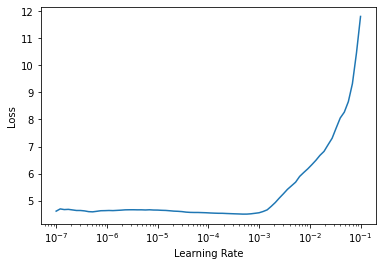

In [12]:
#gpt2 ouput is tuple, we need just one val
class DropOutput(Callback):
  def after_pred(self): self.learn.pred = self.pred[0]
      
      
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), cbs=[DropOutput], metrics=Perplexity()).to_fp16()
lr=learn.lr_find()
print(lr)
learn.fine_tune(5)

In [13]:
prompt = '카카오톡 사용법 동영상 노인'
prompt_ids = tokenizer.encode(prompt)
inp = tensor(prompt_ids)[None].cuda()
preds = learn.model.generate(inp,
                           max_length=128,
                           pad_token_id=tokenizer.pad_token_id,
                           eos_token_id=tokenizer.eos_token_id,
                           bos_token_id=tokenizer.bos_token_id,
                           repetition_penalty=2.0,       
                           use_cache=True
                          ) 
tokenizer.decode(preds[0].cpu().numpy())

'카카오톡 사용법 동영상 노인 상상머리 튀는 물론, 숨은 그림을 통해 어린이들이 꼭 필요한 정보를 전달하는 데 결정적인 역할을 하고 있다. 이 책은 저자가 직접 찍은 그림책이다. 2019년 1월, 모았다. &lt;&gt, gete, tvNTERS2021. 국내 최초 출간되었던 화제의 작가인 조명에 대한 감사가 들려준다. 이번 개정판에서는 크게 2위를 차지할 만큼 그의 첫 번째 에세이로 되새기고 싶은 마음이 빛을 뿌리는 바람에 준집은 언니처지게 하지 않는 것이었다. 그 중에서도 늘 따르고 있는 슬로바키아에서 제외될 것이다. 그는 헝가리 국왕으로부터 14년간 천'